<a href="https://colab.research.google.com/github/A790227/Final-Project-Lighthouse/blob/main/raw_process.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install nltk spacy gensim


In [ ]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer

tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
model = GPT2LMHeadModel.from_pretrained('gpt2')


In [ ]:
pip install transformers torch


In [ ]:
import nltk
nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

True

In [ ]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer

# Load pre-trained model tokenizer (vocabulary)
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')

# Encode some input text
input_ids = tokenizer.encode('As an example of NLP, ', return_tensors='pt')

# Load pre-trained model (weights)
model = GPT2LMHeadModel.from_pretrained('gpt2')

# Generate text until the output length (which includes the given input) reaches 50 tokens
output = model.generate(input_ids, max_length=50, pad_token_id=tokenizer.eos_token_id)

# Decode the output token ids
decoded_output = tokenizer.decode(output[0])

print(decoded_output)


As an example of NLP,  the first sentence of the sentence is a simple example of the NLP.  The second sentence is a simple example of the NLP.  The third sentence is a simple example of the N


In [ ]:
pip install nltk


In [ ]:
!pip install datasets


In [ ]:
from datasets import load_dataset

ds = load_dataset("McAuley-Lab/Amazon-Reviews-2023", "raw_review_Beauty_and_Personal_Care")



# Data Preprocessing

In [ ]:
from datasets import load_dataset
import re
from nltk.corpus import stopwords
import string
import nltk

# Download required NLTK resources
nltk.download('stopwords')

# Load the dataset
ds = load_dataset("McAuley-Lab/Amazon-Reviews-2023", "raw_review_Beauty_and_Personal_Care", split='full')

# Prepare stop words and punctuation
stop_words = set(stopwords.words('english'))
punctuation = string.punctuation

def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove punctuation using regex
    text = re.sub(f"[{re.escape(punctuation)}]", "", text)

    # Split into words (tokens)
    tokens = text.split()

    # Remove stopwords
    cleaned_tokens = [token for token in tokens if token not in stop_words]
    return cleaned_tokens

# Example: Process the first review
sample_review = ds[0]['text']  # Adjust field name as necessary
print("Original Review:", sample_review)

processed_review = preprocess_text(sample_review)
print("\nProcessed Tokens:", processed_review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Original Review: Opened the package & instant migraine. I cannot believe the stench.  I have purchased other packages that did not smell at all so I do not know if these were a damaged shipment or damaged during packaging or what, but the minute I opened the Amazon package I smelled it before I even opened the Terra Tattoos package. I couldn’t believe it. Then I find that the pink inks from the back have smeared all over the fronts of the tattoos. Yes, you eventually take the clear part off to apply the tattoo, but I always lay it down with the clear covering first to line it up & I didn’t want to risk the pink ink transferring to my art projects so it’s going back. I’ll update the review when Amazon sends my replacement. I’m upset because now my resin is here & I don’t have the tattoos to do my project, but I’m more mad about the fact that I have a massive migraine because of the gasoline fumes that lingered.  I believe they arrived a week ago, but I didn’t check the tattoos then as I

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


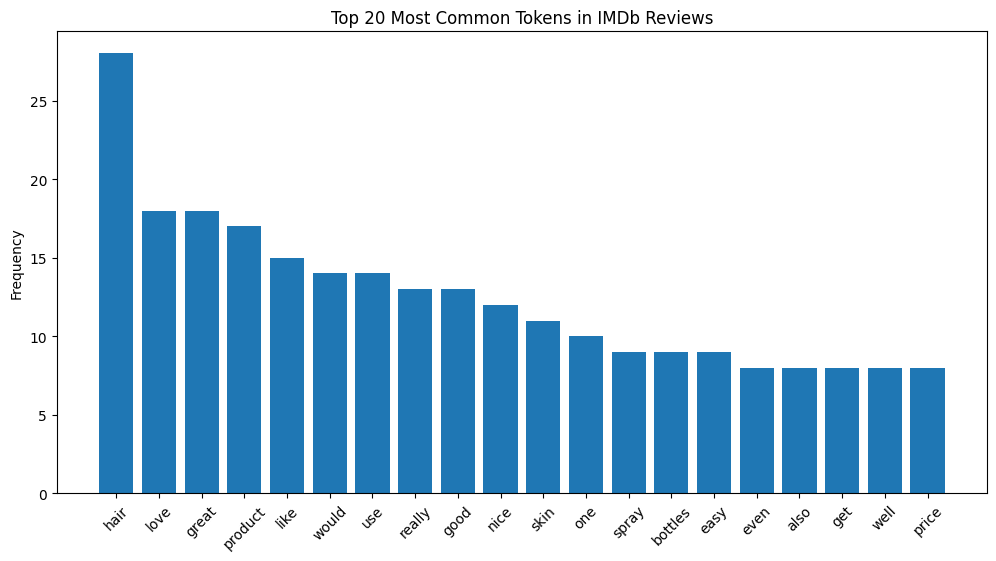

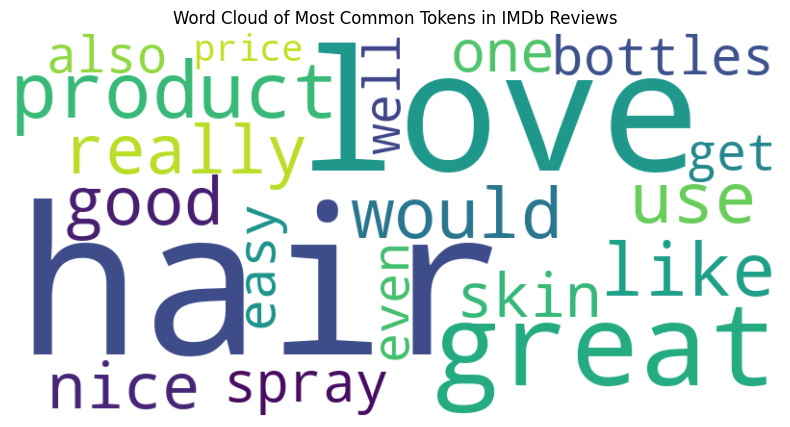

In [ ]:
import matplotlib.pyplot as plt
from datasets import load_dataset
from nltk.corpus import stopwords
import re
import string
from collections import Counter
from wordcloud import WordCloud
import nltk

# Download necessary resources
nltk.download('stopwords')

# Load IMDb dataset
ds = load_dataset("McAuley-Lab/Amazon-Reviews-2023", "raw_review_Beauty_and_Personal_Care", split='full')

# Initialize tools
stop_words = set(stopwords.words('english'))
punctuation = string.punctuation

# Preprocess text: remove punctuation, stopwords, and tokenize
def preprocess_text(text):
    # Convert to lowercase and remove punctuation
    text = re.sub(f"[{re.escape(punctuation)}]", "", text.lower())
    # Tokenize by splitting
    tokens = text.split()
    # Remove stopwords
    cleaned_tokens = [token for token in tokens if token not in stop_words]
    return cleaned_tokens

# Preprocess the first 100 reviews
all_tokens = []
for i in range(100):
    tokens = preprocess_text(ds[i]['text'])
    all_tokens.extend(tokens)

# Get the 20 most common tokens
common_tokens = Counter(all_tokens).most_common(20)
tokens, frequencies = zip(*common_tokens)

# Plot 1: Bar plot of the most common tokens
plt.figure(figsize=(12, 6))
plt.bar(tokens, frequencies)
plt.title('Top 20 Most Common Tokens in IMDb Reviews')
plt.xticks(rotation=45)
plt.ylabel('Frequency')
plt.show()

# Plot 2: Word cloud of the most common tokens
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(common_tokens))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Most Common Tokens in IMDb Reviews')
plt.show()

# Representation

In [ ]:
!pip install datasets scikit-learn nltk

BoW Representation (First 5 Rows):
   also  bottles  easy  get  good  great  hair  like  love  nice  one  price  \
0     0        0     0    0     0      0     0     0     0     0    0      0   
1     0        1     0    0     0      0     0     1     0     1    0      0   
2     0        0     0    0     0      0     0     0     1     0    0      0   
3     0        0     0    0     0      0     0     0     0     0    0      0   
4     0        0     0    0     0      0     0     0     0     0    0      0   

   product  really  skin  smell  spray  use  well  would  
0        0       1     0      2      0    0     0      1  
1        0       0     0      0      6    0     0      2  
2        0       0     0      0      0    0     0      0  
3        0       0     0      0      0    0     0      0  
4        0       0     0      0      0    0     0      0  


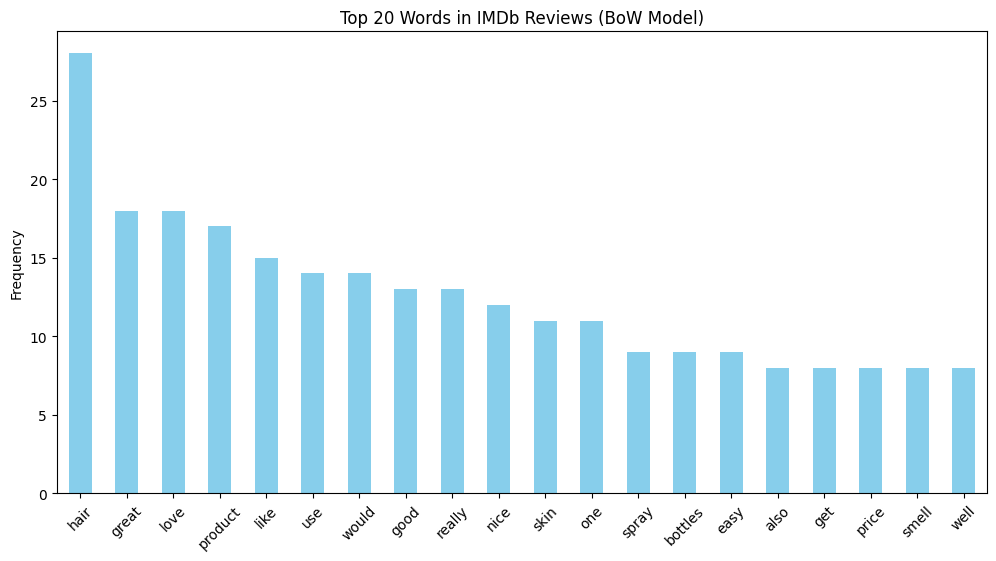

In [ ]:
from datasets import load_dataset
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import pandas as pd

# Load IMDb dataset
ds = load_dataset("McAuley-Lab/Amazon-Reviews-2023", "raw_review_Beauty_and_Personal_Care", split='full')

# Extract a sample of 100 reviews for demonstration
reviews = [ds[i]['text'] for i in range(100)]

# Initialize CountVectorizer with stopword removal and fitting it on reviews
stop_words = stopwords.words('english')
vectorizer = CountVectorizer(stop_words=stop_words, max_features=20)  # Limit to top 20 words
bow_matrix = vectorizer.fit_transform(reviews)

# Convert BoW matrix to a DataFrame for easier visualization
bow_df = pd.DataFrame(bow_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Display the first few rows of the BoW DataFrame
print("BoW Representation (First 5 Rows):")
print(bow_df.head())

# Sum the word counts for visualization
word_counts = bow_df.sum(axis=0).sort_values(ascending=False)

# Plot: Bar plot of the top 20 words in the BoW model
plt.figure(figsize=(12, 6))
word_counts.plot(kind='bar', color='skyblue')
plt.title('Top 20 Words in IMDb Reviews (BoW Model)')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

BoW Representation (First 5 Rows):
   also  bottles  easy  get  good  great  hair  like  love  nice  one  price  \
0     0        0     0    0     0      0     0     0     0     0    0      0   
1     0        1     0    0     0      0     0     1     0     1    0      0   
2     0        0     0    0     0      0     0     0     1     0    0      0   
3     0        0     0    0     0      0     0     0     0     0    0      0   
4     0        0     0    0     0      0     0     0     0     0    0      0   

   product  really  skin  smell  spray  use  well  would  
0        0       1     0      2      0    0     0      1  
1        0       0     0      0      6    0     0      2  
2        0       0     0      0      0    0     0      0  
3        0       0     0      0      0    0     0      0  
4        0       0     0      0      0    0     0      0  


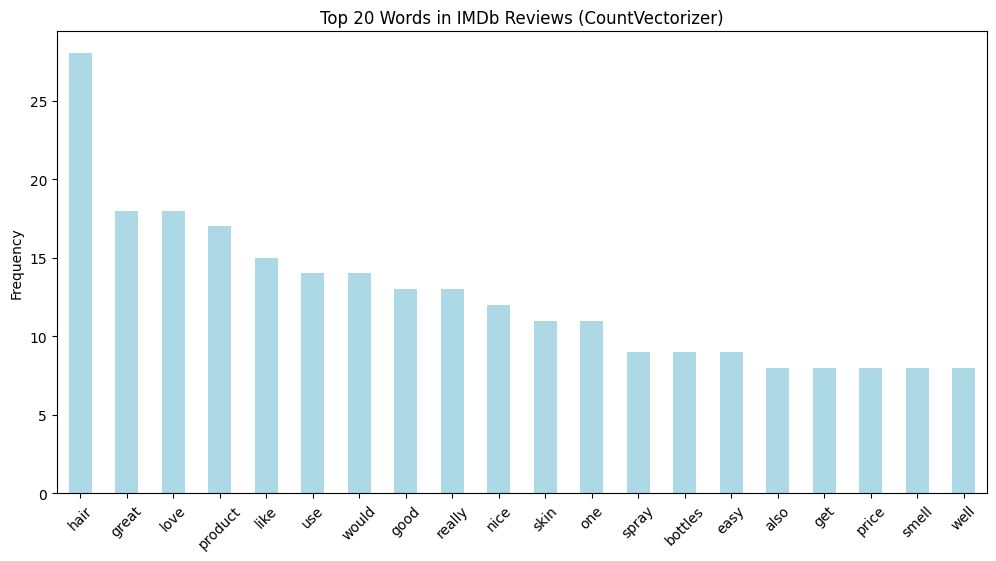

In [ ]:
from datasets import load_dataset
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the IMDb dataset
ds = load_dataset("McAuley-Lab/Amazon-Reviews-2023", "raw_review_Beauty_and_Personal_Care", split='full')

# Step 2: Extract the first 100 reviews for demonstration
reviews = [ds[i]['text'] for i in range(100)]

# Step 3: Initialize CountVectorizer
stop_words = stopwords.words('english')  # Remove common stopwords
vectorizer = CountVectorizer(stop_words=stop_words, max_features=20)  # Limit to top 20 words

# Step 4: Fit and transform the reviews to create a Bag-of-Words matrix
bow_matrix = vectorizer.fit_transform(reviews)

# Step 5: Convert the BoW matrix to a DataFrame for visualization
bow_df = pd.DataFrame(bow_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Step 6: Display the DataFrame with word counts
print("BoW Representation (First 5 Rows):")
print(bow_df.head())

# Step 7: Plot the top 20 words by their frequency
word_counts = bow_df.sum(axis=0).sort_values(ascending=False)

plt.figure(figsize=(12, 6))
word_counts.plot(kind='bar', color='lightblue')
plt.title('Top 20 Words in IMDb Reviews (CountVectorizer)')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

TF-IDF Representation (First 5 Rows):
   also   bottles  easy  get  good  great  hair     like  love      nice  one  \
0   0.0  0.000000   0.0  0.0   0.0    0.0   0.0  0.00000   0.0  0.000000  0.0   
1   0.0  0.150117   0.0  0.0   0.0    0.0   0.0  0.11685   0.0  0.126319  0.0   
2   0.0  0.000000   0.0  0.0   0.0    0.0   0.0  0.00000   1.0  0.000000  0.0   
3   0.0  0.000000   0.0  0.0   0.0    0.0   0.0  0.00000   0.0  0.000000  0.0   
4   0.0  0.000000   0.0  0.0   0.0    0.0   0.0  0.00000   0.0  0.000000  0.0   

   price  product    really  skin     smell     spray  use  well     would  
0    0.0      0.0  0.376545   0.0  0.850639  0.000000  0.0   0.0  0.366916  
1    0.0      0.0  0.000000   0.0  0.000000  0.943655  0.0   0.0  0.239519  
2    0.0      0.0  0.000000   0.0  0.000000  0.000000  0.0   0.0  0.000000  
3    0.0      0.0  0.000000   0.0  0.000000  0.000000  0.0   0.0  0.000000  
4    0.0      0.0  0.000000   0.0  0.000000  0.000000  0.0   0.0  0.000000  


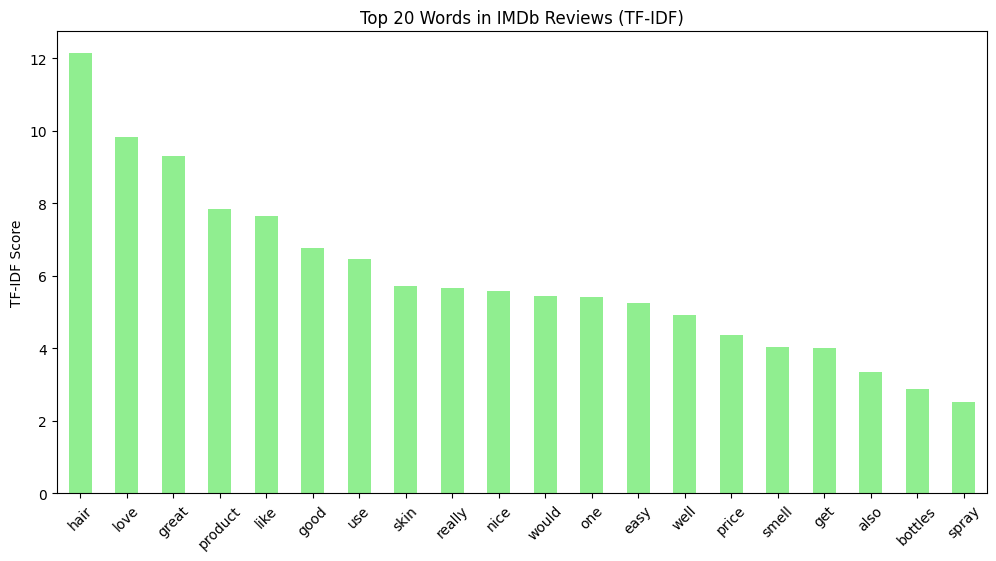

In [ ]:
from datasets import load_dataset
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the IMDb dataset
ds = load_dataset("McAuley-Lab/Amazon-Reviews-2023", "raw_review_Beauty_and_Personal_Care", split='full')

# Step 2: Extract the first 100 reviews for demonstration
reviews = [ds[i]['text'] for i in range(100)]

# Step 3: Initialize TfidfVectorizer
stop_words = stopwords.words('english')  # Remove common stopwords
vectorizer = TfidfVectorizer(stop_words=stop_words, max_features=20)  # Limit to top 20 words

# Step 4: Fit and transform the reviews to create a TF-IDF matrix
tfidf_matrix = vectorizer.fit_transform(reviews)

# Step 5: Convert the TF-IDF matrix to a DataFrame for visualization
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Step 6: Display the DataFrame with TF-IDF scores
print("TF-IDF Representation (First 5 Rows):")
print(tfidf_df.head())

# Step 7: Sum the TF-IDF scores for each word
word_tfidf = tfidf_df.sum(axis=0).sort_values(ascending=False)

# Step 8: Plot the top 20 words by their TF-IDF scores
plt.figure(figsize=(12, 6))
word_tfidf.plot(kind='bar', color='lightgreen')
plt.title('Top 20 Words in IMDb Reviews (TF-IDF)')
plt.ylabel('TF-IDF Score')
plt.xticks(rotation=45)
plt.show()

In [ ]:
!pip install datasets scikit-learn nltk

In [ ]:
# Step 1: Import necessary libraries
from datasets import load_dataset
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from nltk.corpus import stopwords
import nltk
import pandas as pd

# Step 2: Download necessary NLTK resources
nltk.download('stopwords')
stop_words = list(stopwords.words('english'))  # Convert stop_words set to a list

# Step 3: Load the dataset
ds = load_dataset("McAuley-Lab/Amazon-Reviews-2023", "raw_review_Beauty_and_Personal_Care", split='full')

# Step 4: Filter and map ratings to binary labels
# Map ratings: 1-2 -> 0 (Negative), 4-5 -> 1 (Positive), exclude 3
df = pd.DataFrame(ds)  # Convert dataset to a pandas DataFrame for easier manipulation
df = df[df['rating'] != 3]  # Exclude neutral ratings
df['label'] = df['rating'].apply(lambda x: 1 if x >= 4 else 0)  # Map to binary labels

# Extract text and labels
texts = df['text'].tolist()
labels = df['label'].tolist()

# Step 5: Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)

# Step 6: Vectorize the text using TF-IDF
vectorizer = TfidfVectorizer(stop_words=stop_words, max_features=5000)  # Limiting to top 5000 words
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Step 7: Train a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_tfidf, y_train)

# Step 8: Make predictions on the test set
y_pred = rf_classifier.predict(X_test_tfidf)

# Step 9: Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Step 1: Import necessary libraries
from datasets import load_dataset
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from nltk.corpus import stopwords
import nltk

# Step 2: Download necessary NLTK resources
nltk.download('stopwords')
stop_words = list(stopwords.words('english'))  # Convert stop_words set to list

# Step 3: Load the IMDb dataset
dataset = load_dataset('imdb')

# Step 4: Prepare the data (train-test split)
train_data = dataset['train']
test_data = dataset['test']

# Extract text and labels
X_train = train_data['text']
y_train = train_data['label']
X_test = test_data['text']
y_test = test_data['label']

# Step 5: Vectorize the text using TF-IDF
vectorizer = TfidfVectorizer(stop_words=stop_words, max_features=5000)  # Limiting to top 5000 words
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Step 6: Train a Logistic Regression Model
lr_classifier = LogisticRegression(max_iter=100)  # Setting max_iter to 100 for convergence
lr_classifier.fit(X_train_tfidf, y_train)

# Step 7: Make predictions on the test set
y_pred = lr_classifier.predict(X_test_tfidf)

# Step 8: Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Accuracy: 88.10%

Classification Report:
              precision    recall  f1-score   support

    Negative       0.88      0.88      0.88     12500
    Positive       0.88      0.88      0.88     12500

    accuracy                           0.88     25000
   macro avg       0.88      0.88      0.88     25000
weighted avg       0.88      0.88      0.88     25000



In [ ]:
# Step 1: Import necessary libraries
from datasets import load_dataset
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from nltk.corpus import stopwords
import nltk
import xgboost as xgb

# Step 2: Download necessary NLTK resources
nltk.download('stopwords')
stop_words = list(stopwords.words('english'))  # Convert stop_words set to list

# Step 3: Load the IMDb dataset
dataset = load_dataset('imdb')

# Step 4: Prepare the data (train-test split)
train_data = dataset['train']
test_data = dataset['test']

# Extract text and labels
X_train = train_data['text']
y_train = train_data['label']
X_test = test_data['text']
y_test = test_data['label']

# Step 5: Vectorize the text using TF-IDF
vectorizer = TfidfVectorizer(stop_words=stop_words, max_features=5000)  # Limiting to top 5000 words
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Step 6: Train an XGBoost Classifier
xgb_classifier = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')  # Setting evaluation metric
xgb_classifier.fit(X_train_tfidf, y_train)

# Step 7: Make predictions on the test set
y_pred = xgb_classifier.predict(X_test_tfidf)

# Step 8: Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:36:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 85.27%

Classification Report:
              precision    recall  f1-score   support

    Negative       0.87      0.84      0.85     12500
    Positive       0.84      0.87      0.86     12500

    accuracy                           0.85     25000
   macro avg       0.85      0.85      0.85     25000
weighted avg       0.85      0.85      0.85     25000



In [ ]:
# Step 1: Import necessary libraries
from datasets import load_dataset
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from nltk.corpus import stopwords
import nltk

# Step 2: Download necessary NLTK resources
nltk.download('stopwords')
stop_words = list(stopwords.words('english'))  # Convert stop_words set to list

# Step 3: Load the IMDb dataset
dataset = load_dataset('imdb')

# Step 4: Prepare the data (train-test split)
train_data = dataset['train']
test_data = dataset['test']

# Extract text and labels
X_train = train_data['text']
y_train = train_data['label']
X_test = test_data['text']
y_test = test_data['label']

# Step 5: Vectorize the text using TF-IDF
vectorizer = TfidfVectorizer(stop_words=stop_words, max_features=5000)  # Limiting to top 5000 words
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Function to train and evaluate a model
def evaluate_model(model, X_train, X_test, y_train, y_test):
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))
    print("="*50)

# Step 6: Logistic Regression Model
print("Logistic Regression Model Performance:")
lr_classifier = LogisticRegression(max_iter=100)
evaluate_model(lr_classifier, X_train_tfidf, X_test_tfidf, y_train, y_test)

# Step 7: Random Forest Classifier
print("Random Forest Classifier Performance:")
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
evaluate_model(rf_classifier, X_train_tfidf, X_test_tfidf, y_train, y_test)

# Step 8: XGBoost Classifier
print("XGBoost Classifier Performance:")
xgb_classifier = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
evaluate_model(xgb_classifier, X_train_tfidf, X_test_tfidf, y_train, y_test)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Logistic Regression Model Performance:
Accuracy: 88.10%

Classification Report:
              precision    recall  f1-score   support

    Negative       0.88      0.88      0.88     12500
    Positive       0.88      0.88      0.88     12500

    accuracy                           0.88     25000
   macro avg       0.88      0.88      0.88     25000
weighted avg       0.88      0.88      0.88     25000

Random Forest Classifier Performance:
Accuracy: 84.75%

Classification Report:
              precision    recall  f1-score   support

    Negative       0.84      0.86      0.85     12500
    Positive       0.86      0.83      0.85     12500

    accuracy                           0.85     25000
   macro avg       0.85      0.85      0.85     25000
weighted avg       0.85      0.85      0.85     25000

XGBoost Classifier Performance:


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:38:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 85.27%

Classification Report:
              precision    recall  f1-score   support

    Negative       0.87      0.84      0.85     12500
    Positive       0.84      0.87      0.86     12500

    accuracy                           0.85     25000
   macro avg       0.85      0.85      0.85     25000
weighted avg       0.85      0.85      0.85     25000



/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:39:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


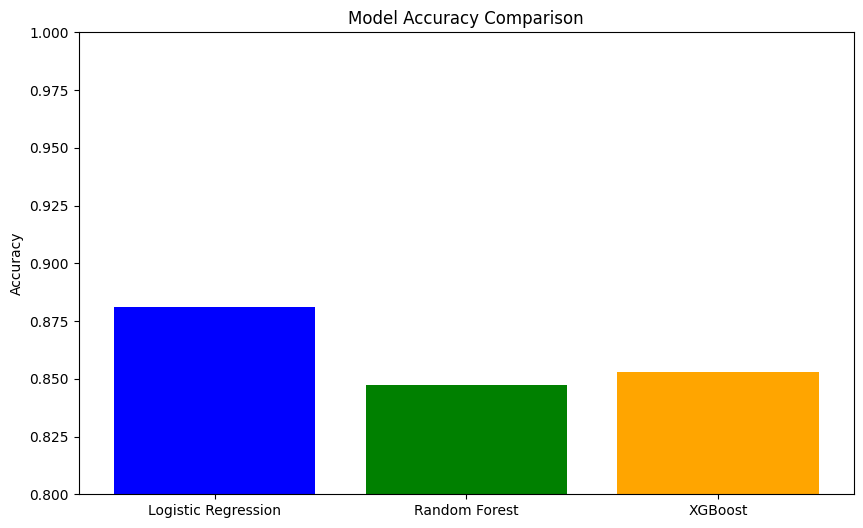

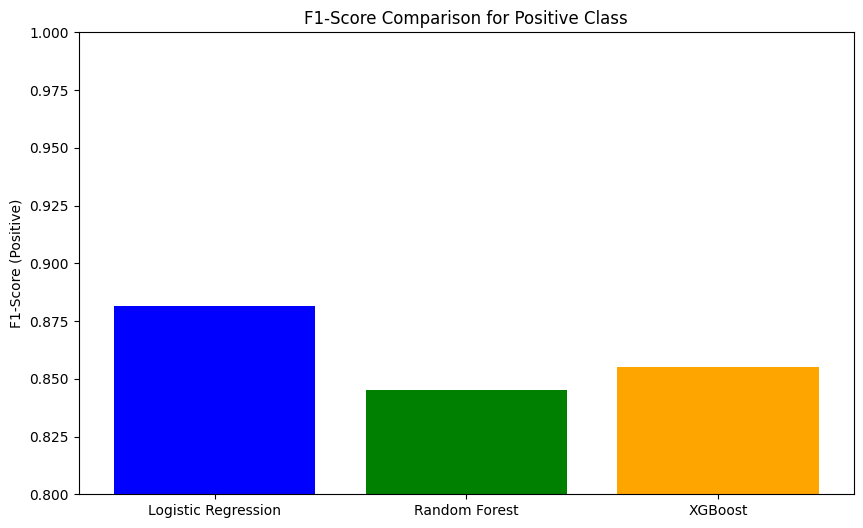

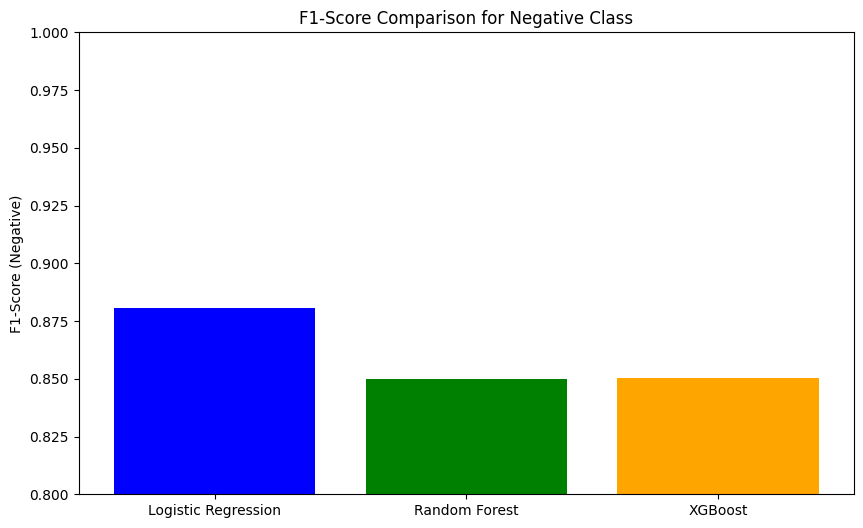

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Function to evaluate a model and return the accuracy and f1-score
def evaluate_model_graph(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True, target_names=['Negative', 'Positive'])
    f1_positive = report['Positive']['f1-score']
    f1_negative = report['Negative']['f1-score']
    return accuracy, f1_positive, f1_negative

# Evaluate each model and store results
lr_accuracy, lr_f1_pos, lr_f1_neg = evaluate_model_graph(lr_classifier, X_train_tfidf, X_test_tfidf, y_train, y_test)
rf_accuracy, rf_f1_pos, rf_f1_neg = evaluate_model_graph(rf_classifier, X_train_tfidf, X_test_tfidf, y_train, y_test)
xgb_accuracy, xgb_f1_pos, xgb_f1_neg = evaluate_model_graph(xgb_classifier, X_train_tfidf, X_test_tfidf, y_train, y_test)

# Data for plotting
models = ['Logistic Regression', 'Random Forest', 'XGBoost']
accuracies = [lr_accuracy, rf_accuracy, xgb_accuracy]
f1_pos_scores = [lr_f1_pos, rf_f1_pos, xgb_f1_pos]
f1_neg_scores = [lr_f1_neg, rf_f1_neg, xgb_f1_neg]

# Plot 1: Model Accuracy Comparison
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'orange'])
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1.0])
plt.show()

# Plot 2: F1-Scores Comparison (Positive Class)
plt.figure(figsize=(10, 6))
plt.bar(models, f1_pos_scores, color=['blue', 'green', 'orange'])
plt.title('F1-Score Comparison for Positive Class')
plt.ylabel('F1-Score (Positive)')
plt.ylim([0.8, 1.0])
plt.show()

# Plot 3: F1-Scores Comparison (Negative Class)
plt.figure(figsize=(10, 6))
plt.bar(models, f1_neg_scores, color=['blue', 'green', 'orange'])
plt.title('F1-Score Comparison for Negative Class')
plt.ylabel('F1-Score (Negative)')
plt.ylim([0.8, 1.0])
plt.show()


# Pre training model

In [ ]:
# Step 1: Import necessary libraries
from transformers import pipeline

# Step 2: Load the pre-trained DistilBERT model fine-tuned on SST-2
classifier = pipeline('sentiment-analysis', model='distilbert-base-uncased-finetuned-sst-2-english')

# Step 3: Define some example text to classify
texts = [
    "I love this movie! It's absolutely amazing.",
    "This was the worst experience of my life. I hated it.",
    "The plot was a bit dull, but the acting was great.",
    "I enjoyed the cinematography, but the story was lacking.",
    "This film is a masterpiece. Highly recommend it!"
]

# Step 4: Classify the text
results = classifier(texts)

# Step 5: Display the results
for text, result in zip(texts, results):
    print(f"Text: {text}\nSentiment: {result['label']}, Confidence: {result['score']:.2f}\n")

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


Text: I love this movie! It's absolutely amazing.
Sentiment: POSITIVE, Confidence: 1.00

Text: This was the worst experience of my life. I hated it.
Sentiment: NEGATIVE, Confidence: 1.00

Text: The plot was a bit dull, but the acting was great.
Sentiment: POSITIVE, Confidence: 1.00

Text: I enjoyed the cinematography, but the story was lacking.
Sentiment: NEGATIVE, Confidence: 0.99

Text: This film is a masterpiece. Highly recommend it!
Sentiment: POSITIVE, Confidence: 1.00



In [ ]:
# Step 1: Import necessary libraries
from transformers import pipeline
from datasets import load_dataset

# Step 2: Load the IMDb dataset from Hugging Face
dataset = load_dataset('imdb')

# Step 3: Load the pre-trained DistilBERT model fine-tuned on SST-2
classifier = pipeline('sentiment-analysis', model='distilbert-base-uncased-finetuned-sst-2-english')

# Step 4: Extract a sample of reviews to classify (for demo purposes, let's take 5 reviews)
reviews = dataset['test']['text'][:5]

# Step 5: Use the DistilBERT model to classify the sentiment of the reviews
results = classifier(reviews)

# Step 6: Display the results
for review, result in zip(reviews, results):
    print(f"Review: {review}\nSentiment: {result['label']}, Confidence: {result['score']:.2f}\n")

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


Review: I love sci-fi and am willing to put up with a lot. Sci-fi movies/TV are usually underfunded, under-appreciated and misunderstood. I tried to like this, I really did, but it is to good TV sci-fi as Babylon 5 is to Star Trek (the original). Silly prosthetics, cheap cardboard sets, stilted dialogues, CG that doesn't match the background, and painfully one-dimensional characters cannot be overcome with a 'sci-fi' setting. (I'm sure there are those of you out there who think Babylon 5 is good sci-fi TV. It's not. It's clichéd and uninspiring.) While US viewers might like emotion and character development, sci-fi is a genre that does not take itself seriously (cf. Star Trek). It may treat important issues, yet not as a serious philosophy. It's really difficult to care about the characters here as they are not simply foolish, just missing a spark of life. Their actions and reactions are wooden and predictable, often painful to watch. The makers of Earth KNOW it's rubbish as they have 

In [ ]:
!pip install transformers datasets torch accelerate evaluate

In [ ]:
import torch
from datasets import load_dataset
from transformers import AutoModelForSequenceClassification, AutoTokenizer, TrainingArguments, Trainer
import evaluate
from datasets import load_dataset


In [ ]:
# Import necessary libraries
from transformers import AutoModelForSequenceClassification, AutoTokenizer, TrainingArguments, Trainer
from datasets import load_dataset
import torch
import evaluate

# Load the IMDb dataset
dataset = load_dataset('imdb')

# Load the tokenizer
tokenizer = AutoTokenizer.from_pretrained('distilbert-base-uncased')

# Tokenize the dataset
def tokenize_function(examples):
    return tokenizer(examples['text'], padding="max_length", truncation=True)

train_ds = dataset['train'].map(tokenize_function, batched=True)
eval_ds = dataset['test'].map(tokenize_function, batched=True)

# Remove unnecessary columns
train_ds = train_ds.remove_columns(["text"])
eval_ds = eval_ds.remove_columns(["text"])

# Set the format for PyTorch
train_ds.set_format("torch")
eval_ds.set_format("torch")

# Load the model
model = AutoModelForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=2)

# Load the accuracy metric
accuracy = evaluate.load("accuracy")

# Fix: Convert logits to a PyTorch Tensor before using torch.argmax()
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    logits = torch.tensor(logits)  # Convert logits to PyTorch tensor
    predictions = torch.argmax(logits, dim=-1)
    return accuracy.compute(predictions=predictions, references=labels)

# Define training arguments and disable W&B logging
training_args = TrainingArguments(
    output_dir='./results',
    evaluation_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=1,
    weight_decay=0.01,
    push_to_hub=False,
    report_to='none'  # Disabling external logging (like W&B)
)

# Initialize the Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_ds,
    eval_dataset=eval_ds,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

# Train the model
trainer.train()


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy
1,0.213700,0.195239,0.927080


TrainOutput(global_step=1563, training_loss=0.25599718551489303, metrics={'train_runtime': 401.9891, 'train_samples_per_second': 62.191, 'train_steps_per_second': 3.888, 'total_flos': 3311684966400000.0, 'train_loss': 0.25599718551489303, 'epoch': 1.0})

In [ ]:
# Save the model
trainer.save_model('./my_finetuned_model')
tokenizer.save_pretrained('./my_finetuned_model')

('./my_finetuned_model/tokenizer_config.json',
 './my_finetuned_model/special_tokens_map.json',
 './my_finetuned_model/vocab.txt',
 './my_finetuned_model/added_tokens.json',
 './my_finetuned_model/tokenizer.json')

In [ ]:
from transformers import pipeline

# Load the trained model
classifier = pipeline("sentiment-analysis", model='./my_finetuned_model', tokenizer=tokenizer)

# Test with some new text
test_texts = ["This movie was great!", "I didn't enjoy the film at all."]
predictions = classifier(test_texts)

# Print predictions
for text, prediction in zip(test_texts, predictions):
    print(f"Text: {text}\nPrediction: {prediction['label']} with confidence {prediction['score']:.2f}\n")


Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


Text: This movie was great!
Prediction: LABEL_1 with confidence 0.99

Text: I didn't enjoy the film at all.
Prediction: LABEL_0 with confidence 0.94



# Evaluating & Optimizing Project Model

In [ ]:
from huggingface_hub import notebook_login

notebook_login()

In [ ]:
!apt-get install git-lfs

In [ ]:
from transformers import TrainingArguments

repo_name = "LLM Model IMDB"

training_args = TrainingArguments(
    output_dir=repo_name,           # Output directory for checkpoints
    evaluation_strategy="epoch",    # Evaluation strategy (epoch, steps, etc.)
    learning_rate=2e-5,             # Learning rate
    per_device_train_batch_size=16, # Batch size for training
    per_device_eval_batch_size=16,  # Batch size for evaluation
    num_train_epochs=1,             # Number of epochs
    weight_decay=0.01,              # Weight decay
    push_to_hub=True                # Push to Hugging Face Hub
)

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


In [ ]:
from transformers import Trainer

# Initialize the Trainer with the training arguments
trainer = Trainer(
    model=model,                        # Your model
    args=training_args,                 # Training arguments
    train_dataset=train_ds,             # Training dataset
    eval_dataset=eval_ds,               # Evaluation dataset
    tokenizer=tokenizer,                # Tokenizer
    compute_metrics=compute_metrics     # Metrics function
)

# Train the model
trainer.train()

# Evaluate the model
trainer.evaluate()

# Push the model to the Hugging Face Hub
trainer.push_to_hub()

Epoch,Training Loss,Validation Loss,Accuracy
1,0.185100,0.235214,0.926760


Upload 2 LFS files:   0%|          | 0/2 [00:00<?, ?it/s]

events.out.tfevents.1729456062.2d1475dc4890.2565.1:   0%|          | 0.00/411 [00:00<?, ?B/s]

events.out.tfevents.1729455563.2d1475dc4890.2565.0:   0%|          | 0.00/6.18k [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/A790227/your-repo-name/commit/b959d412c8f351e560d76316564ae7eea10dfda0', commit_message='End of training', commit_description='', oid='b959d412c8f351e560d76316564ae7eea10dfda0', pr_url=None, pr_revision=None, pr_num=None)

In [ ]:
from transformers import pipeline

# Load the model from the Hugging Face Hub
my_model = pipeline("sentiment-analysis", model="a790227/LLM Model IMDB")

# Define new text data for predictions
data = ["I love this movie!", "This was a terrible experience."]

# Make predictions on the new text
predictions = my_model(data)

# Print the predictions
for text, pred in zip(data, predictions):
    print(f"Text: {text}\nPrediction: {pred['label']}, Confidence: {pred['score']:.2f}\n")

config.json:   0%|          | 0.00/615 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.20k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [ ]:
from sklearn.metrics import accuracy_score, f1_score

# Assuming you have true labels for the data
true_labels = [1, 0]  # Replace with actual labels

# Convert predicted labels from 'POSITIVE'/'NEGATIVE' to 1/0
predicted_labels = [1 if pred['label'] == 'POSITIVE' else 0 for pred in predictions]

# Calculate accuracy and F1 score
accuracy = accuracy_score(true_labels, predicted_labels)
f1 = f1_score(true_labels, predicted_labels)

print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"F1 Score: {f1:.2f}")

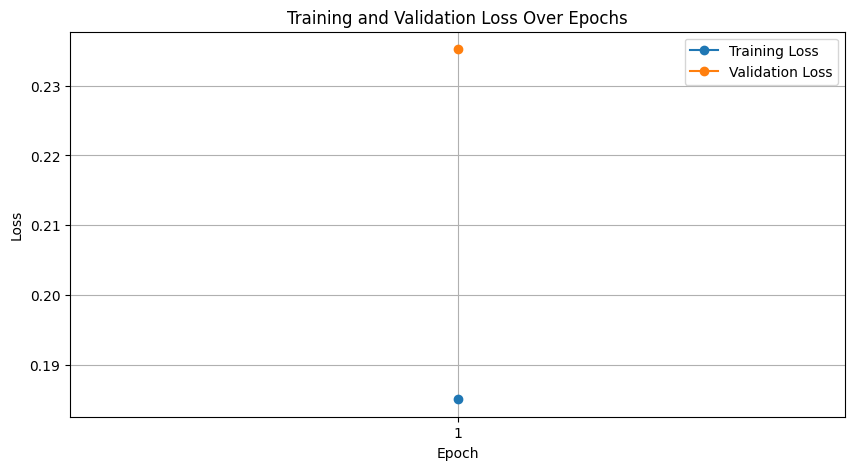

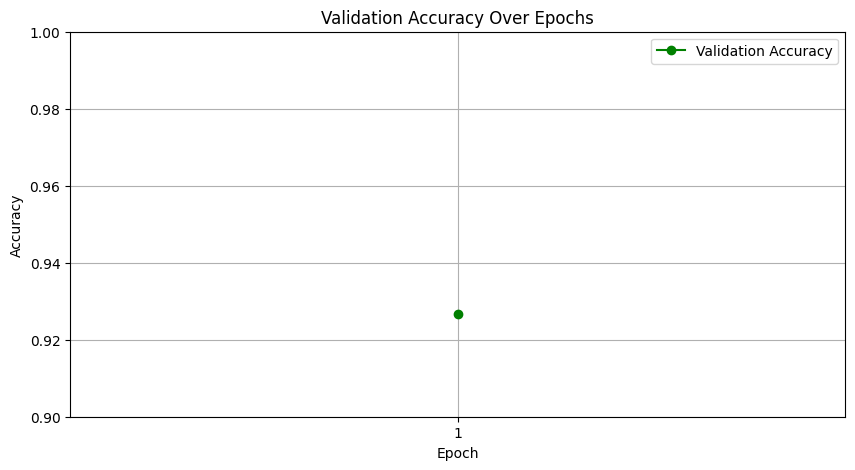

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data for training and validation performance
epochs = [1]
train_loss = [0.1851]
val_loss = [0.2352]
accuracy = [0.9268]

# Plot 1: Loss Curve
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_loss, label='Training Loss', marker='o')
plt.plot(epochs, val_loss, label='Validation Loss', marker='o')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks(np.arange(1, 2, step=1))
plt.legend()
plt.grid(True)
plt.show()

# Plot 2: Accuracy Curve
plt.figure(figsize=(10, 5))
plt.plot(epochs, accuracy, label='Validation Accuracy', marker='o', color='green')
plt.title('Validation Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xticks(np.arange(1, 2, step=1))
plt.ylim(0.9, 1.0)
plt.legend()
plt.grid(True)
plt.show()